In [2]:
# Importo librerías iniciales
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re

In [3]:
# Asigno variables a los csv principales que voy a utilizar
movies_df = pd.read_csv('data/tmdb_5000_movies.csv')
credits_df = pd.read_csv('data/tmdb_5000_credits.csv')

In [4]:
movies_df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
credits_df

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [6]:
movies_df = movies_df.merge(credits_df,on='title')

In [7]:
movies_df.shape

(4809, 23)

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4809 non-null   int64  
 1   genres                4809 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4809 non-null   int64  
 4   keywords              4809 non-null   object 
 5   original_language     4809 non-null   object 
 6   original_title        4809 non-null   object 
 7   overview              4806 non-null   object 
 8   popularity            4809 non-null   float64
 9   production_companies  4809 non-null   object 
 10  production_countries  4809 non-null   object 
 11  release_date          4808 non-null   object 
 12  revenue               4809 non-null   int64  
 13  runtime               4807 non-null   float64
 14  spoken_languages      4809 non-null   object 
 15  status               

In [9]:
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,movie_id
count,4.809000e+03,4809.000000,4809.000000,4.809000e+03,4807.000000,4809.000000,4809.000000,4809.000000
mean,2.902780e+07,57120.571429,21.491664,8.227511e+07,106.882255,6.092514,690.331670,57120.571429
std,4.070473e+07,88653.369849,31.803366,1.628379e+08,22.602535,1.193989,1234.187111,88653.369849
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.000000
25%,7.800000e+05,9012.000000,4.667230,0.000000e+00,94.000000,5.600000,54.000000,9012.000000
50%,1.500000e+07,14624.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000,14624.000000
75%,4.000000e+07,58595.000000,28.350529,9.291317e+07,118.000000,6.800000,737.000000,58595.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000,459488.000000


In [10]:
movies_df.values

array([[237000000,
        '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]',
        'http://www.avatarmovie.com/', ..., 19995,
        '[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "cha

In [11]:
print(movies_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


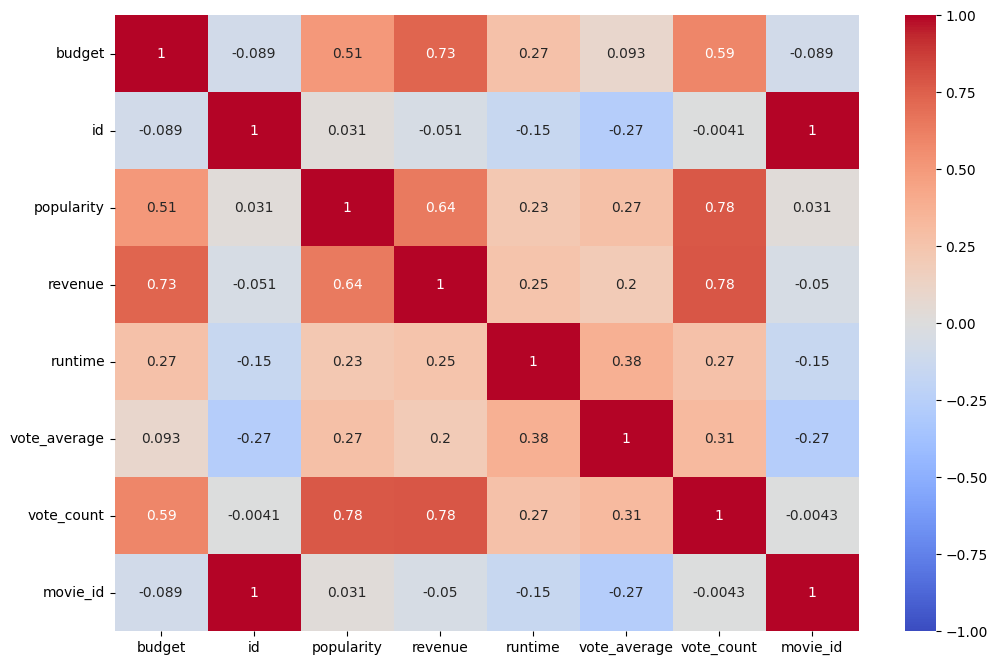

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(movies_df.corr(numeric_only=True), annot=True, cmap='coolwarm', vmax=1, vmin=-1);

Viendo el mapa de calor puedo extraer las siguiente **correlaciones**: <br>
- **Correlaciones positivas fuertes (corr > 0.7)**: 'budget' y 'revenue', 'popularity' y 'vote_count', 'revenue' y 'vote_count'. <br>
- **Correlaciones positivas moderadas (0.3 > corr < 0.7)**: 'budget' y 'popularity', 'budget' y 'vote_count', 'popularity' y 'revenue', 'runtime' y 'vote_average', 'vote_average' y 'vote_count'.

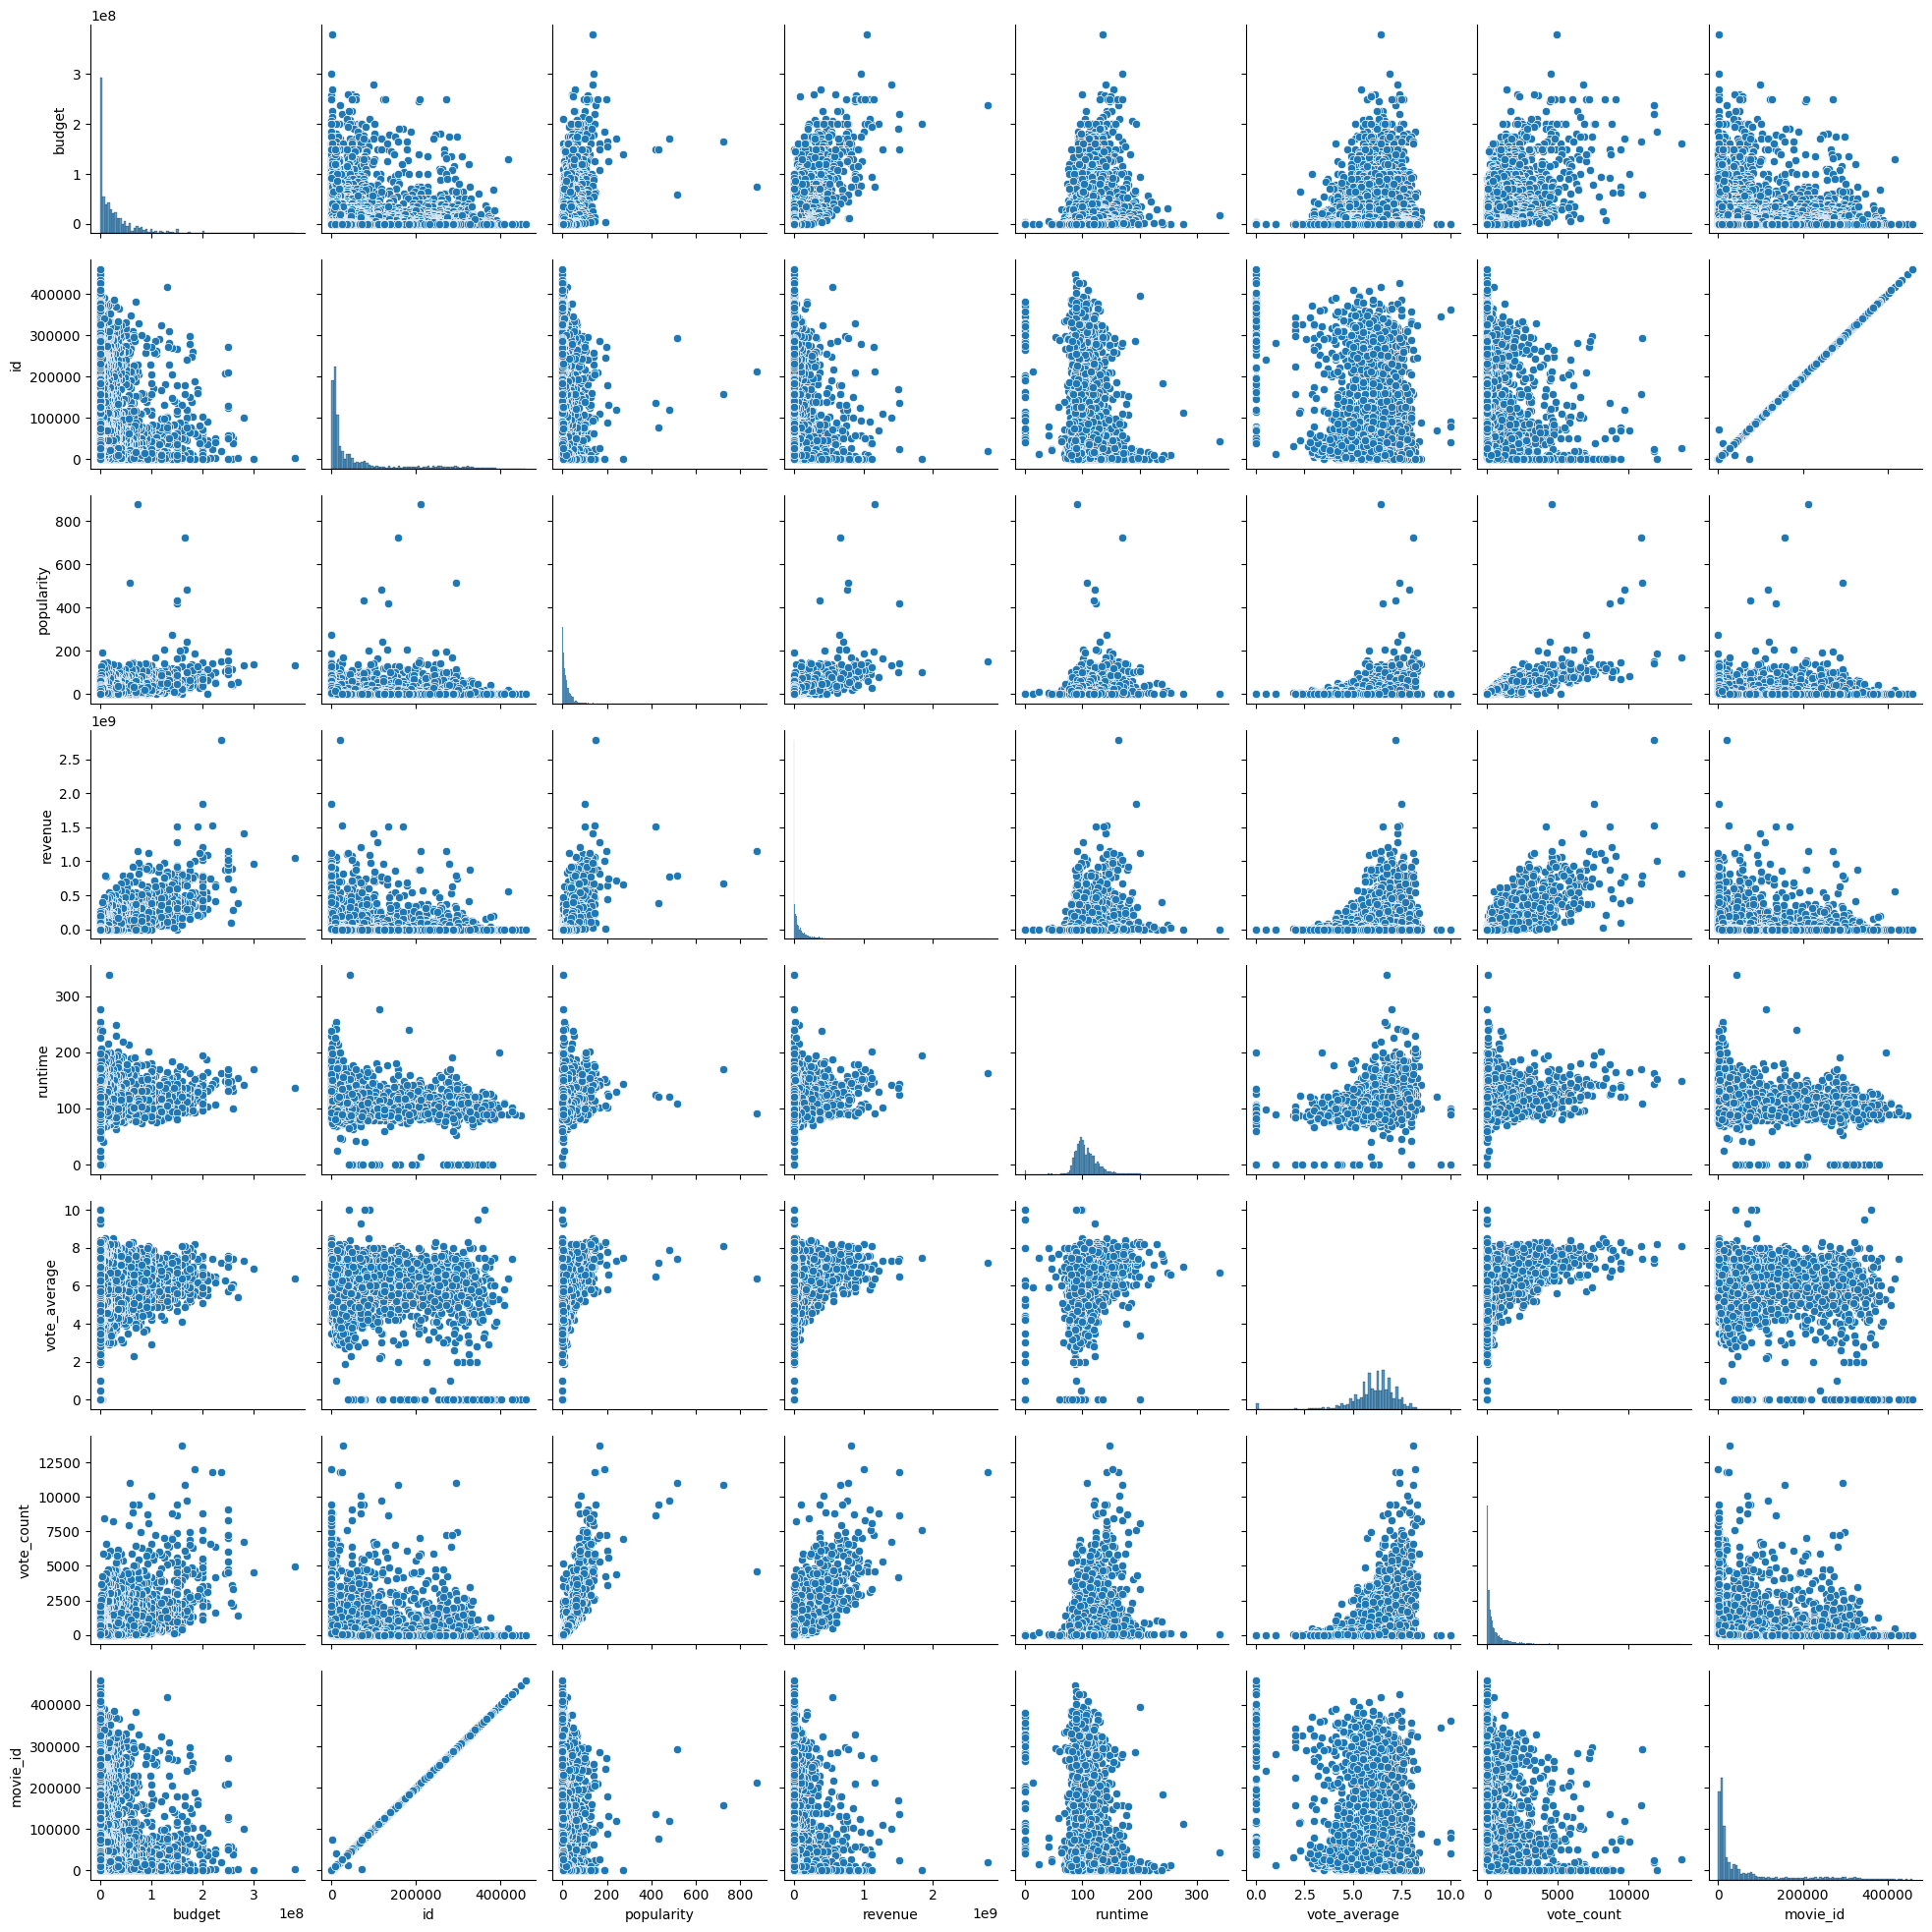

In [13]:
sns.pairplot(movies_df);

#### **Relación entre 'budget' y 'revenue'**

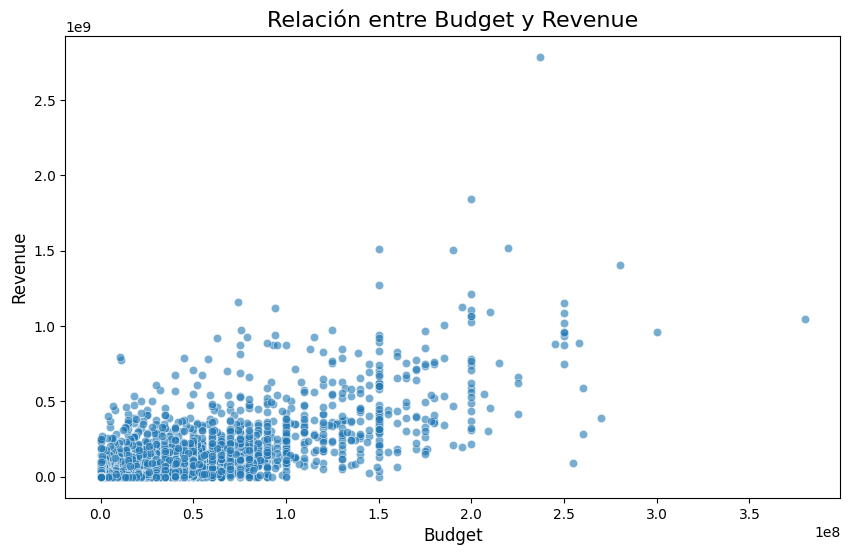

In [14]:
# Gráfico de dispersión entre 'budget' y 'revenue'
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.scatterplot(data=movies_df, x='budget', y='revenue', alpha=0.6)

# Añado etiquetas y título
plt.title('Relación entre Budget y Revenue', fontsize=16)
plt.xlabel('Budget', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Muestro el gráfico
plt.show()

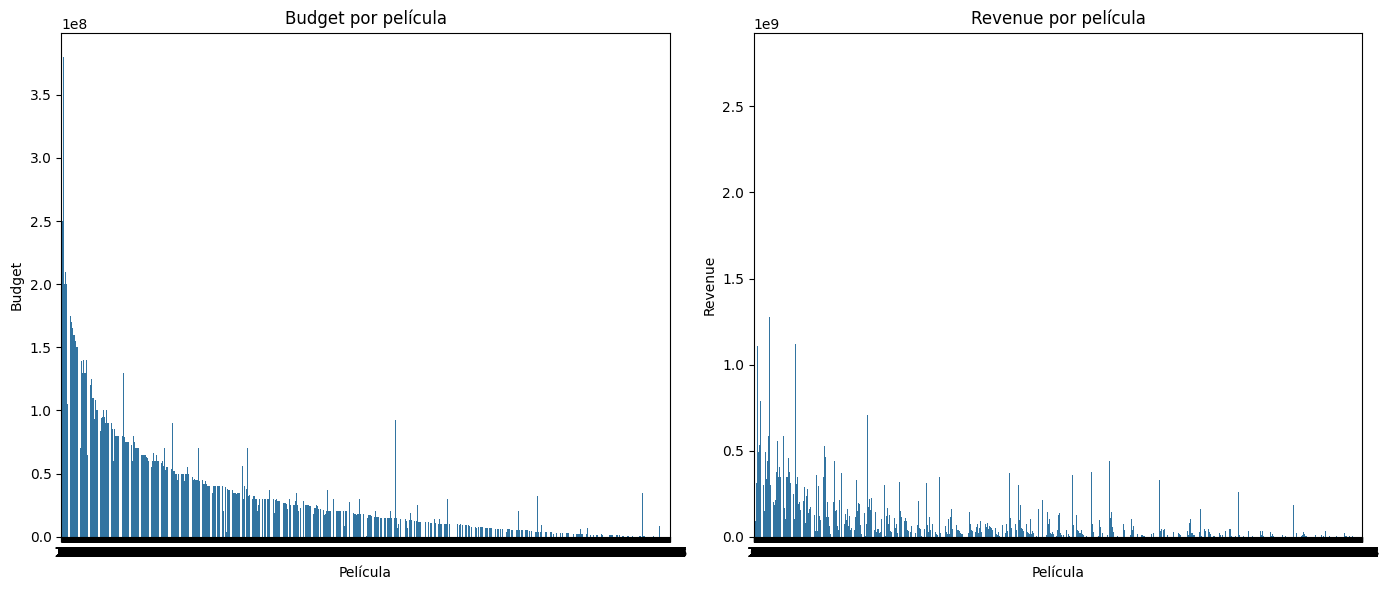

In [15]:
# Creo una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Gráfico de barras para el 'budget'
sns.barplot(data=movies_df, x=movies_df.index, y='budget', ax=axes[0])
axes[0].set_title('Budget por película')
axes[0].set_xlabel('Película')
axes[0].set_ylabel('Budget')

# Gráfico de barras para el 'revenue'
sns.barplot(data=movies_df, x=movies_df.index, y='revenue', ax=axes[1])
axes[1].set_title('Revenue por película')
axes[1].set_xlabel('Película')
axes[1].set_ylabel('Revenue')

plt.tight_layout()
plt.show()

#### **Relación de 'vote_count' y 'original_title' (30 películas más votadas)**

In [16]:
# Filtro los 'original_title' con mayor 'vote_count'
top_30_movies = movies_df[['original_title', 'vote_count']].sort_values(by='vote_count', ascending=False).head(25)
top_30_movies

,original_title,vote_count
96,Inception,13752
65,The Dark Knight,12002
0,Avatar,11800
16,The Avengers,11776
788,Deadpool,10995
95,Interstellar,10867
287,Django Unchained,10099
94,Guardians of the Galaxy,9742
426,The Hunger Games,9455
127,Mad Max: Fury Road,9427


/var/folders/m4/4mx3075j6459pp9gm5pk4tsc0000gn/T/ipykernel_7835/1146010800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_count', y='original_title', data=top_30_movies, palette='Purples_d')


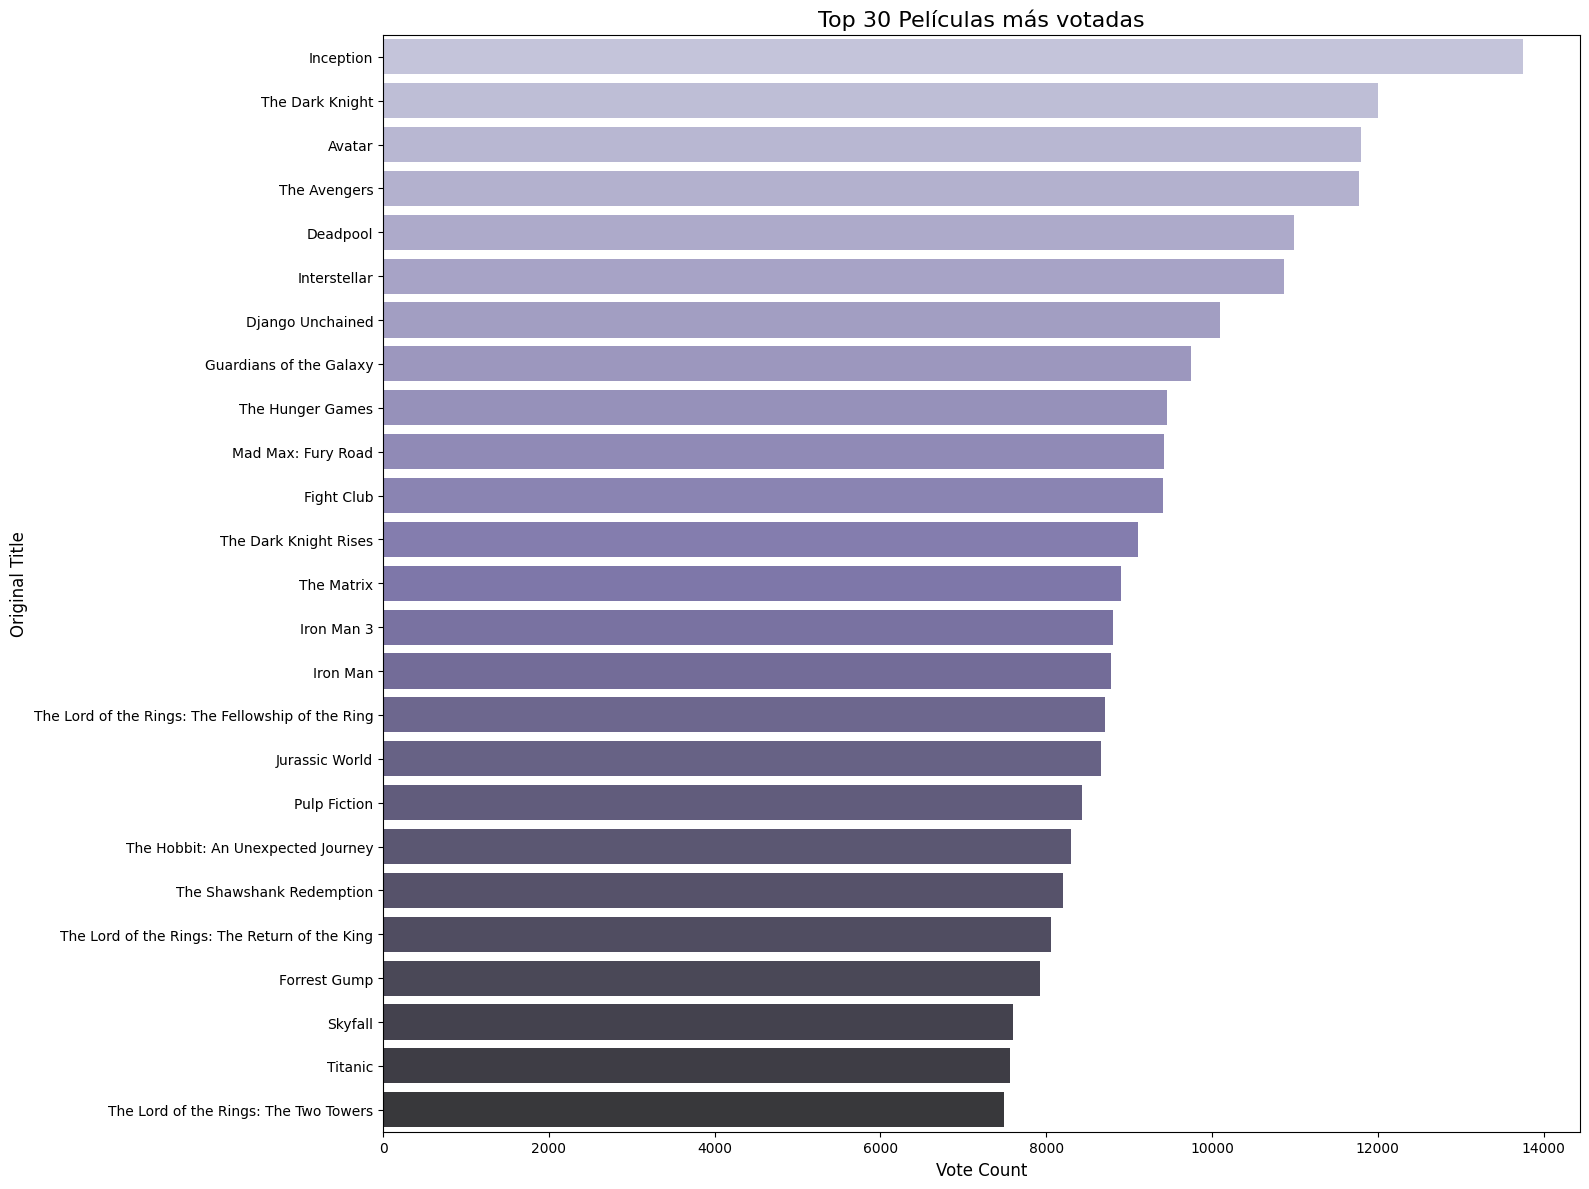

In [17]:
# Creo un gráfico de barras con seaborn
plt.figure(figsize=(16, 12))
sns.barplot(x='vote_count', y='original_title', data=top_30_movies, palette='Purples_d')

# Personalizo el gráfico
plt.title('Top 30 Películas más votadas', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Original Title', fontsize=12)
plt.tight_layout()

# Muestro el gráfico
plt.show()

#### **Relación de 'vote_count' y 'popularity'**

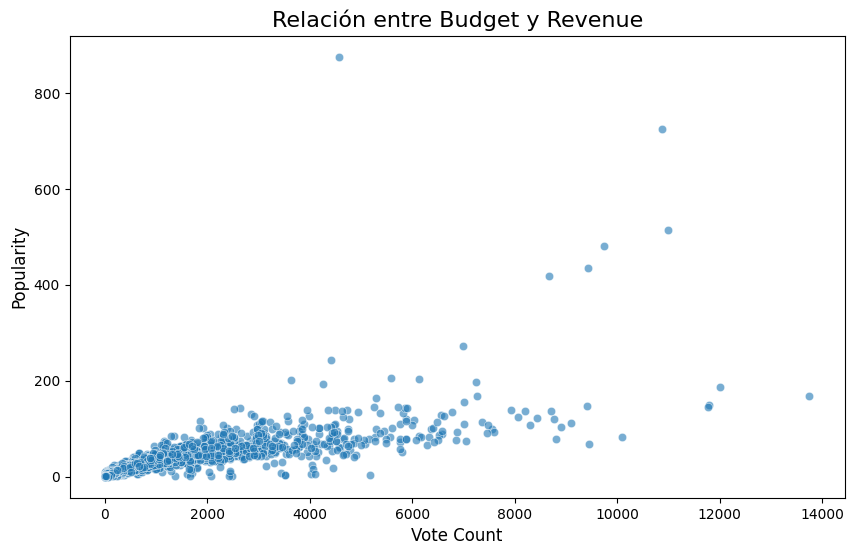

In [18]:
# Gráfico de dispersión entre 'vote_count' y 'popularity'
plt.figure(figsize=(10, 6))  # Tamaño de la figura
sns.scatterplot(data=movies_df, x='vote_count', y='popularity', alpha=0.6)

# Añado etiquetas y título
plt.title('Relación entre Budget y Revenue', fontsize=16)
plt.xlabel('Vote Count', fontsize=12)
plt.ylabel('Popularity', fontsize=12)

# Muestro el gráfico
plt.show()

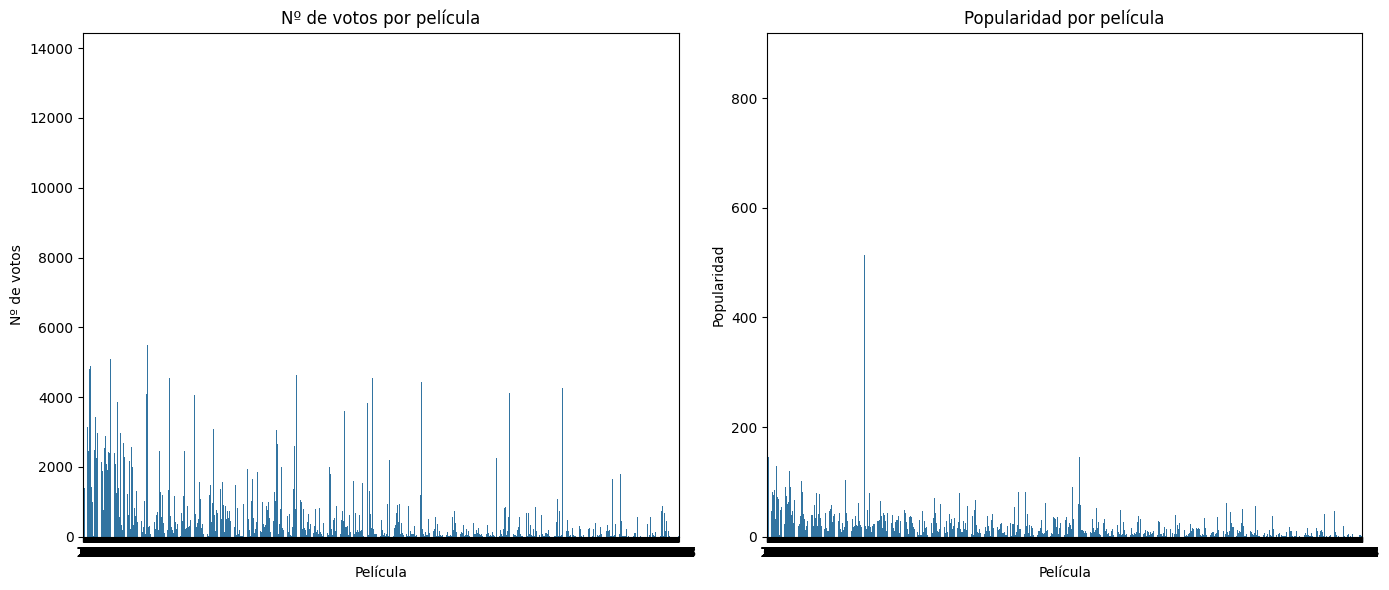

In [19]:
# Creo una figura con dos subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 fila, 2 columnas

# Gráfico de barras para el 'budget'
sns.barplot(data=movies_df, x=movies_df.index, y='vote_count', ax=axes[0])
axes[0].set_title('Nº de votos por película')
axes[0].set_xlabel('Película')
axes[0].set_ylabel('Nº de votos')

# Gráfico de barras para el 'revenue'
sns.barplot(data=movies_df, x=movies_df.index, y='popularity', ax=axes[1])
axes[1].set_title('Popularidad por película')
axes[1].set_xlabel('Película')
axes[1].set_ylabel('Popularidad')

plt.tight_layout()
plt.show()

## Limpieza del DataFrame

#### Elimino columnas que no son relevantes o con información duplicada 

In [20]:
# Columnas con información duplicada: 
# 'id' == 'movie_id
# 'original_title' == 'title' 

# Columnas no relevantes: 'homepage', 'original_language', 'spoken_languages', 'tagline'...

movies_df.drop(columns=['budget', 'homepage', 'id', 'original_language', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline','title'], inplace=True)

#### **Convierto columnas json en string**

In [21]:
# Importo librería 
import ast

In [22]:
# Función para parsear
def parse(data):
    try:
        return ast.literal_eval(data)
    except:
        return []

In [23]:
# Columna 'genres' 
movies_df['genres'] = movies_df['genres'].apply(parse)
movies_df['genres'] = movies_df['genres'].apply(
    lambda x: [item['name'] for item in x] if isinstance(x, list) else []
)
movies_df['genres'] = movies_df['genres'].astype(str)

# Colummna 'keywords' 
movies_df['keywords'] = movies_df['keywords'].apply(parse)
movies_df['keywords'] = movies_df['keywords'].apply(
    lambda x: [item['name'] for item in x] if isinstance(x, list) else []
)
movies_df['keywords'] = movies_df['keywords'].astype(str)

# Columna 'production_companies' 
#movies_df['production_companies'] = movies_df['production_companies'].apply(parse)
#movies_df['production_companies'] = movies_df['production_companies'].apply(
#  lambda x: [item['name'] for item in x] if isinstance(x, list) else []
#)
#movies_df['production_companies'] = movies_df['production_companies'].astype(str) 

# Columna 'production_countries' 
#movies_df['production_countries'] = movies_df['production_countries'].apply(parse)
#movies_df['production_countries'] = movies_df['production_countries'].apply(
#   lambda x: [item['name'] for item in x] if isinstance(x, list) else []
#)
#movies_df['production_countries'] = movies_df['production_countries'].astype(str) 

# Columna 'cast' 
movies_df['cast'] = movies_df['cast'].apply(parse)
movies_df['cast'] = movies_df['cast'].apply(
    lambda x: [item['name'] for item in x] if isinstance(x, list) else []
)
movies_df['cast'] = movies_df['cast'].astype(str) 

# Columna 'crew', de la que obtengo la nueva columna 'filmmaker'  
def get_director(crew_data):
    crew = parse(crew_data)
    for member in crew:
        if member.get('job') == 'Director':
            return member.get('name')
    return None
movies_df['filmmaker'] = movies_df['crew'].apply(get_director)
movies_df.drop('crew', axis=1, inplace=True)

In [24]:
# Verifico si hay nulos en la columna 'filmmaker'
print(movies_df["filmmaker"].isnull().sum())

30


In [25]:
titles_null_filmmaker = movies_df[movies_df['filmmaker'].isnull()][['original_title', 'popularity', 'vote_average','vote_count']]
print(titles_null_filmmaker)

                                         original_title  popularity  \
3665                                          Flying By    1.546169   
3674                                    Running Forever    0.028756   
3734                                                Paa    2.126139   
3982                                 Boynton Beach Club    0.188870   
4073                                          Sharkskin    0.027801   
4110    The Book of Mormon Movie, Volume 1: The Journey    0.031947   
4123                             Hum To Mohabbat Karega    0.001186   
4128                                     Roadside Romeo    0.253595   
4252                              Me You and Five Bucks    0.094105   
4311                          Down & Out With The Dolls    0.002386   
4320                                          Crowsnest    0.057564   
4328                                 Sex With Strangers    0.014406   
4380                              Dream with the Fishes    0.948316   
4407  

In [26]:
# Como 17 es un número muy poco representativo del total y ninguna de estas películas resulta relevante, decido borrar las filas con valores nulos en 'filmmaker'
movies_df = movies_df.dropna(subset=["filmmaker"])

In [27]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4779 entries, 0 to 4808
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   genres          4779 non-null   object 
 1   keywords        4779 non-null   object 
 2   original_title  4779 non-null   object 
 3   overview        4776 non-null   object 
 4   popularity      4779 non-null   float64
 5   vote_average    4779 non-null   float64
 6   vote_count      4779 non-null   int64  
 7   movie_id        4779 non-null   int64  
 8   cast            4779 non-null   object 
 9   filmmaker       4779 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 410.7+ KB


#### **Columna 'genres'**

In [28]:
# Elimino los corchetes, los espacios en blanco y las comillas simples
movies_df['genres'] = movies_df['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
# Divido la cadena en una lista con los elementos delimitados por comas
movies_df['genres'] = movies_df['genres'].str.split(',')

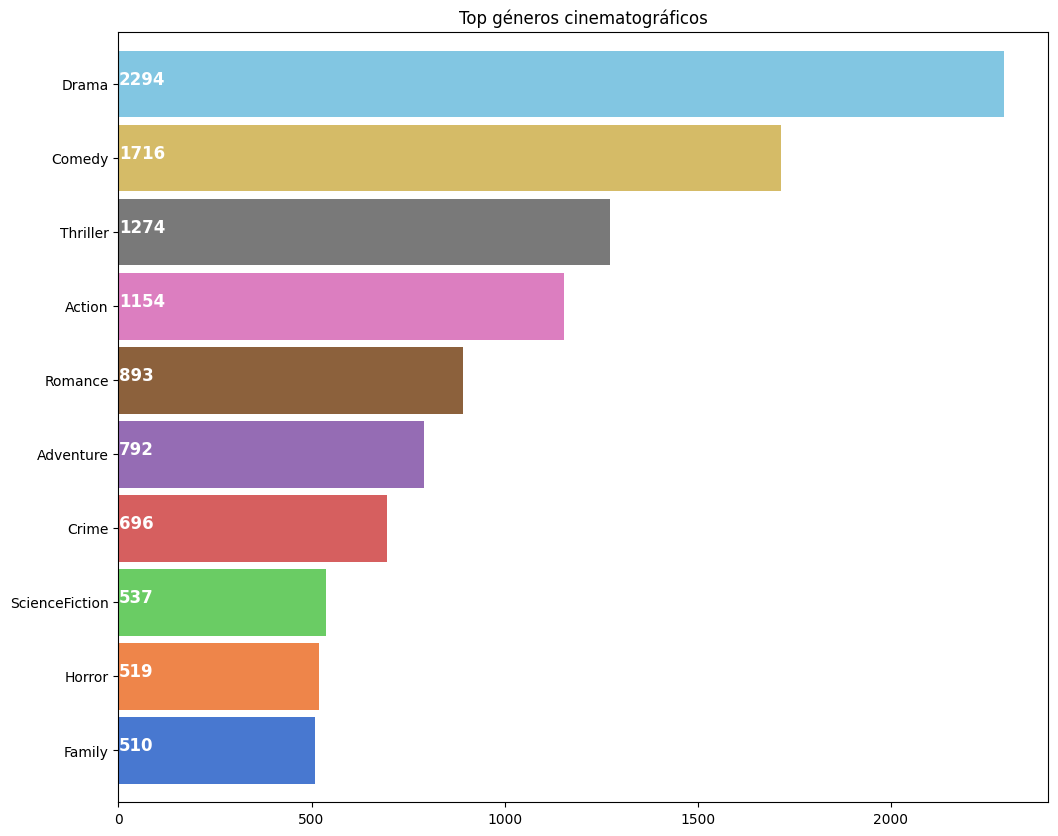

In [29]:
# 10 géneros más frecuentes
plt.subplots(figsize=(12,10))
list_genres = []
for i in movies_df['genres']:
    list_genres.extend(i)
ax = pd.Series(list_genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',10))
for i, v in enumerate(pd.Series(list_genres).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top géneros cinematográficos')
plt.show()

In [30]:
# Genero una lista para todos los posibles únicos valores de 'genre' mencionados en el dataset
genreList = []
for index, row in movies_df.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)
genreList

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western',
 'Comedy',
 'Romance',
 'Horror',
 'Mystery',
 'History',
 'War',
 'Music',
 'Documentary',
 'Foreign',
 'TVMovie',
 '']

In [31]:
# One Hot Encoding para múltiples etiquetas con la función binayr, que genera una lista de valores binario (1s y 0s)
# Cada género es comparado con una lista de géneros posibles ('genreList').
# Se genera una lista binaria donde 1 indica que el género está presente y 0 indica que no lo está.

def binary(genre_list):
    binaryList = []
    
    for genre in genreList:
        if genre in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# Convierto una nueva lista de géneros en una lista binaria que indica qué géneros están presentes
# Almaceno el resultado en una nueva columna del DataFrame llamada 'genres_bin'
movies_df['genres_bin'] = movies_df['genres'].apply(lambda x: binary(x))
movies_df['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

#### **Columna 'keywords'**

In [32]:
# Investigando en kaggle, recomiendan estas tres librerías para manipular texto en Python
from wordcloud import WordCloud, STOPWORDS # Crea visualización de nubes de palabras a partir de su frecuencia
import nltk # Librería para el procesamiento de Lenguaje Natural (NLP)
from nltk.corpus import stopwords # Elimina palabras comunes que no son útiles para el análisis de texto, como artículos y preposiciones

In [33]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/felixdemolina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/felixdemolina/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

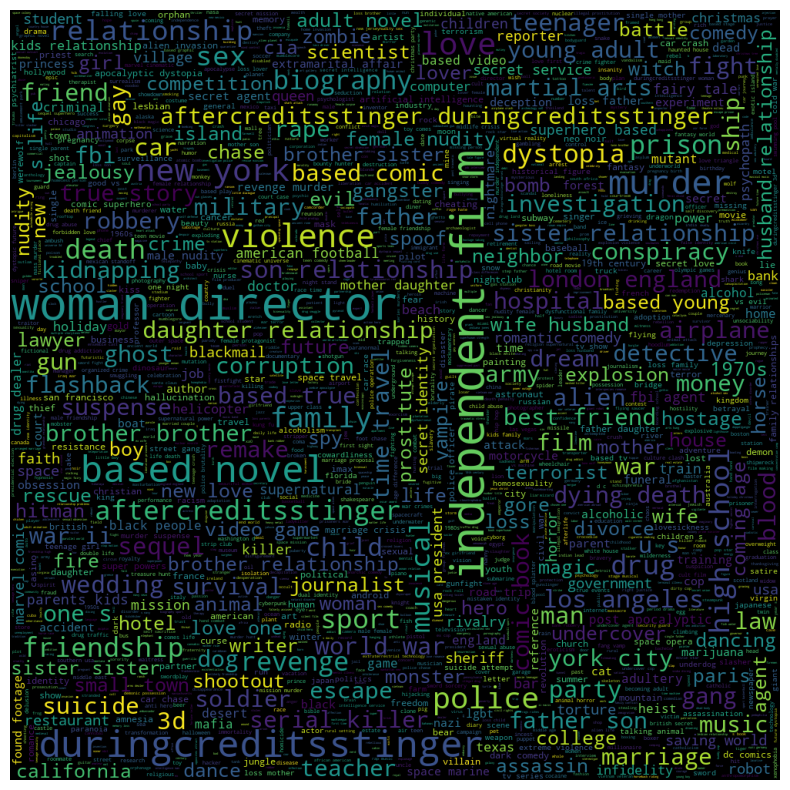

In [35]:
# Configuración de tamaño de la figura
plt.subplots(figsize=(12,12))

# Lista de stopwords
stop_words = set(stopwords.words('english'))
stop_words.update([',',';','!','?','.', '(', ')', '$', '#', '+', ':', '...', ' '])

# Tokenizar las palabras en la columna 'keywords' y luego aplanarlas en una lista
words = movies_df['keywords'].dropna().apply(nltk.word_tokenize)
word = []
for i in words:
    word.extend(i)

# Convertir la lista a minúsculas y filtrar las stopwords
word = [i.lower() for i in word if i.lower() not in stop_words]

# Crear la nube de palabras
wc = WordCloud(
    background_color="black", 
    max_words=2000, 
    stopwords=STOPWORDS, 
    max_font_size=60,
    width=1000,
    height=1000
)

# Generar la nube de palabras
wc.generate(" ".join(word))

# Mostrar la nube de palabras
plt.imshow(wc)
plt.axis('off')
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [36]:
# Elimino los corchetes, los espacios en blanco y las comillas simples
movies_df['keywords'] = movies_df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'').str.replace('"','')
# Divido la cadena en una lista con los elementos delimitados por comas
movies_df['keywords'] = movies_df['keywords'].str.split(',')

In [37]:
# Convierto cada lista de diccionarios a su representación en string, eliminando caracteres como corchetes, espacios y comillas simples
# Ordeno las palabras clave alfabéticamente
# Divido el string en elementos de lista, las comas como separadores

for i,j in zip(movies_df['keywords'],movies_df.index):
    list2 = []
    list2 = i
    list2.sort() 
    movies_df.loc[j,'keywords'] = str(list2)
movies_df['keywords'] = movies_df['keywords'].str.strip('[]').str.replace(' ','').str.replace("'",'')
movies_df['keywords'] = movies_df['keywords'].str.split(',')

In [38]:
# Genero una lista para todas las palabras clave únicas
wordsList = []
for index, row in movies_df.iterrows():
    genres = row["keywords"]
    
    for genre in genres: # Itera sobre cada palabra clave en la lista de 'genres' para esa fila
        if genre not in wordsList:
            wordsList.append(genre)

In [39]:
# One Hot Encoding para múltiples etiquetas con la función binayr, que genera una lista de valores binario (1s y 0s)
# Cada palabra es comparado con una lista de palabras posibles ('wordsList')
# Se genera una lista binaria donde 1 indica que la palabra clave está presente y 0 indica que no lo está

def binary(words):
    binaryList = []
    for genre in wordsList:
        if genre in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

# Almaceno el resultado en una nueva columna del DataFrame llamada 'words_bin'
movies_df['words_bin'] = movies_df['keywords'].apply(lambda x: binary(x))

#### **Columna 'cast'**

In [40]:
# Elimino los corchetes
movies_df['cast'] = movies_df['cast'].str.strip('[]')
# Corrijo casos donde Jr. está precedido por coma y espacio
movies_df['cast'] = movies_df['cast'].str.replace(', Jr.', ' Jr.')
# Elimino el espacio entre el nombre y Jr.
movies_df['cast'] = movies_df['cast'].str.replace(' Jr.', 'Jr.')
# # Elimino los corchetes, los espacios en blanco y las comillas
movies_df['cast'] = movies_df['cast'].str.replace(' ', '').str.replace("'", '').str.replace('"', '')
# Divido la cadena en una lista con los elementos delimitados por comas
movies_df['cast'] = movies_df['cast'].str.split(',')
# Expresión regular para separar palabras entre sí y palabras de puntos (.)
movies_df['cast'] = movies_df['cast'].apply(
    lambda lista_nombres: [
        re.sub(r'([a-zñáéíóúü])([A-ZÁÉÍÓÚÜ])|([.])([A-ZÁÉÍÓÚÜ])', 
               r'\1\3 \2\4', 
               nombre)
        for nombre in lista_nombres
    ]
)

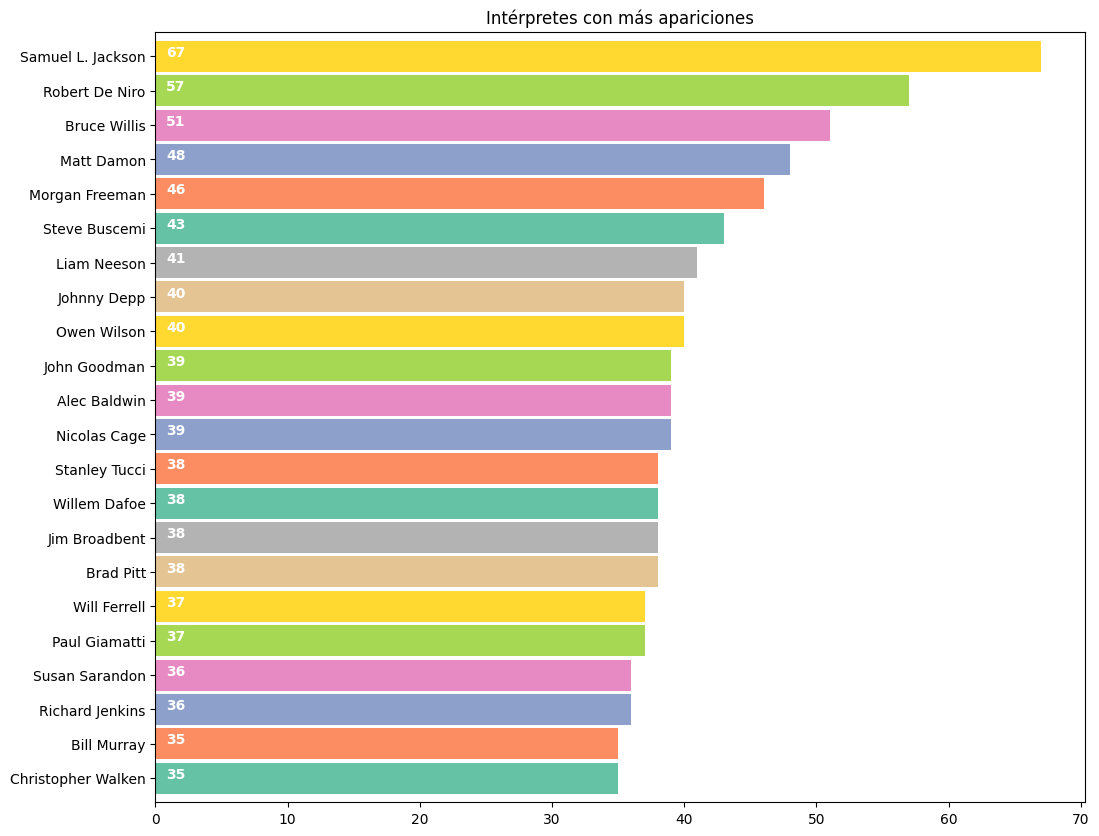

In [41]:
# 20 intérpretes que más aparecen
plt.subplots(figsize=(12,10))
list_cast=[]
for i in movies_df['cast']:
    list_cast.extend(i)
ax=pd.Series(list_cast).value_counts()[:22].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('Set2',40))
for i, v in enumerate(pd.Series(list_cast).value_counts()[:22].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Intérpretes con más apariciones')
plt.show()

In [42]:
# Genero una lista para todos los posibles únicos valores de 'cast' mencionados en el dataset
castList = []
for index, row in movies_df.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [43]:
# One Hot Encoding para múltiples etiquetas con la función binary, que genera una lista de valores binario (1s y 0s)
# Cada intérprete es comparado con una lista de reparto posible ('castList').
# Se genera una lista binaria donde 1 indica que la actriz o actor está presente y 0 indica que no lo está.

def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

# Convierto una nueva lista de reparto en una lista binaria que indica qué actrices y actores están presentes
# Almaceno el resultado en una nueva columna del DataFrame llamada 'cast_bin'
movies_df['cast_bin'] = movies_df['cast'].apply(lambda x: binary(x))
movies_df['cast_bin'].head()

0    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

#### **Columnas 'vote_count' y 'vote_average'**

In [44]:
# Elimino las peliculas con 0 'vote_average' y que no incluyan el nombre del 'filmmaker'
movies_df = movies_df[(movies_df['vote_average']!=0)] 
movies_df = movies_df[movies_df['filmmaker']!='']

##### Antes de crear el modelo... ¿cómo podría definir cuántos votos como mínimo ha de tener una película para ser susceptible de recomendación? ¿y qué nota media?

In [45]:
vote_counts = movies_df[movies_df['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movies_df[movies_df['vote_average'].notnull()]['vote_average'].astype('int')

votos_minimos = vote_counts.quantile(0.6) # Establezco el percentil 60, es decir, que el número de votos esté por encima del 60% de las películas
print('nº de votos mínimos para ser recomendada:', votos_minimos)

nota_minima = vote_averages.mean()
print('nota mínima para ser recomendada:', round(nota_minima, 2))

nº de votos mínimos para ser recomendada: 380.0
nota mínima para ser recomendada: 5.73


## Creación del modelo1 v1 (WIP) para demo (sin tener en cuenta dataset 'ratings' de usuarios) - NearestNeighboors con Weights ajustados por mí

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors

In [47]:
# PREPROCESAMIENTO DE CARACTERÍSTICAS BINARIAS 
# Codifico filmmaker en binario
mlb = MultiLabelBinarizer()
filmmaker_bin = mlb.fit_transform(movies_df["filmmaker"].apply(lambda x: [x]))

# Convierto listas binarias a arrays numpy
genres_bin = np.array(movies_df["genres_bin"].tolist())
words_bin = np.array(movies_df["words_bin"].tolist())
cast_bin = np.array(movies_df["cast_bin"].tolist())

# Escalo características numéricas
scaler = StandardScaler()
numerical_features = movies_df[["popularity", "vote_average"]]
numerical_scaled = scaler.fit_transform(numerical_features)

In [ ]:
# Combino todas las características que deseo considerar para recomendar una película
X = np.concatenate([
    genres_bin,
    words_bin,
    cast_bin,
    filmmaker_bin,
    numerical_scaled
], axis=1)

# Defino pesos relativos de acuerdo a mi criterio
weights = {
    "genres": 0.33,      
    "keywords": 0.27,    
    "cast": 0.1,        
    "filmmaker": 0.18,   
    "numerical": 0.12     
}

# Aplicar pesos a cada grupo de características
weighted_X = np.concatenate([
    genres_bin * weights["genres"],
    words_bin * weights["keywords"],
    cast_bin * weights["cast"],
    filmmaker_bin * weights["filmmaker"],
    numerical_scaled * weights["numerical"]
], axis=1)

In [49]:
# MODELO DE VECINOS MÁS CERCANOS
nn = NearestNeighbors(n_neighbors=100, metric="cosine", algorithm="brute")  # Busco 100 candidatos iniciales
nn.fit(weighted_X)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=100)

In [50]:
# FUNCIÓN DE RECOMENDACIÓN DE PELÍCULAS
def recomendar_peliculas_filtradas(titulo, n_recomendaciones=5, min_vote_count=380, min_vote_avg=5.73):
    try:
        # Obtengo película de referencia
        idx = movies_df[movies_df["original_title"] == titulo].index[0]
        reference_votes = movies_df.at[idx, "vote_count"]
        
        # Obtengo candidatos iniciales
        distances, indices = nn.kneighbors([weighted_X[idx]], n_neighbors=100)
        
        # Convierto a DataFrame para filtrar
        candidatos = movies_df.iloc[indices[0]].copy()
        candidatos["distance"] = distances[0]
        
        # Aplico filtros
        filtered = candidatos[
            (candidatos["vote_count"] >= min_vote_count) &
            (candidatos["vote_average"] >= min_vote_avg) &
            (candidatos.index != idx)  # Excluyo la película del input
        ]
        
        # Ordeno y selecciono
        final_recomendaciones = filtered.sort_values(by=["distance", "popularity"], ascending=[True, False])
        
        if len(final_recomendaciones) < n_recomendaciones:
            print(f"Advertencia: Solo se encontraron {len(final_recomendaciones)} películas que cumplen los criterios")
            
        return final_recomendaciones.head(n_recomendaciones)[[
            "original_title", "filmmaker", "cast", "overview", 
            "vote_count", "vote_average", "popularity"
        ]]
    
    except IndexError:
        print("Película no encontrada en el dataset")
        return pd.DataFrame()

In [ ]:
# Solicito título al usuario
titulo_usuario = input("What movie do you like?")
# Obtengo recomendaciones
recomendaciones = recomendar_peliculas_filtradas(titulo_usuario, min_vote_count=380, min_vote_avg=5.73)

# Muestro resultados con formato
if not recomendaciones.empty:
    for idx, row in recomendaciones.iterrows():
        print(f"""
        Título: {row['original_title']}
        Director: {row['filmmaker']}
        Resumen: {row['overview'][:150]}...
        ---
        Valoración: {row['vote_average']}/10 (basado en {row['vote_count']} votos)
        """)
else:
    print("No se encontraron recomendaciones")


        Título: Silver Linings Playbook
        Director: David O. Russell
        Resumen: After spending eight months in a mental institution, a former teacher moves back in with his parents and tries to reconcile with his ex-wife....
        ---
        Valoración: 6.9/10 (basado en 4742 votos)
        

        Título: Minions
        Director: Kyle Balda
        Resumen: Minions Stuart, Kevin and Bob are recruited by Scarlet Overkill, a super-villain who, alongside her inventor husband Herb, hatches a plot to take over...
        ---
        Valoración: 6.4/10 (basado en 4571 votos)
        

        Título: Interstellar
        Director: Christopher Nolan
        Resumen: Interstellar chronicles the adventures of a group of explorers who make use of a newly discovered wormhole to surpass the limitations on human space t...
        ---
        Valoración: 8.1/10 (basado en 10867 votos)
        

        Título: Dear John
        Director: Lasse Hallström
        Resumen: Sergeant

## Creación del modelo 2 v1 (WIP) para demo (sin tener en cuenta dataset 'ratings' de usuarios) - NearestNeighboors con PCA

In [53]:
# Combino todas las características que deseo considerar para recomendar una película
features = np.concatenate([
    genres_bin,
    words_bin,
    cast_bin,
    filmmaker_bin,
    numerical_scaled
], axis=1)

In [ ]:
# REDUZCO LA DIMENSIONALIDAD
pca = PCA(n_components=4200)

# Calculo PCA con nueva matriz de pesos
X_pca = pca.fit_transform(features)     

# MODELO DE VECINOS MÁS CERCANOS 2
nn2 = NearestNeighbors(n_neighbors=50, metric="cosine", algorithm="brute")  # Busco 100 candidatos iniciales
nn2.fit(X_pca)

4729


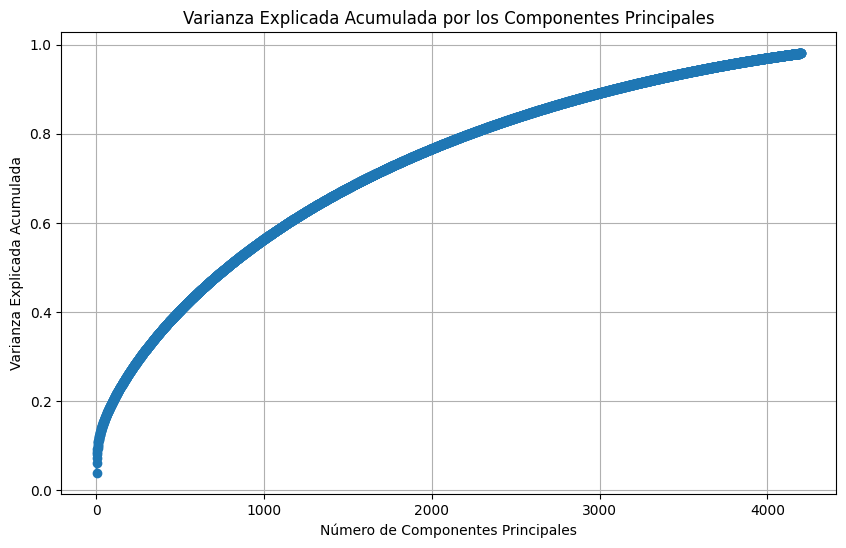

Varianza explicada por cada componente:
Componente 1: 0.0379
Componente 2: 0.0235
Componente 3: 0.0110
Componente 4: 0.0080
Componente 5: 0.0058
Componente 6: 0.0052
Componente 7: 0.0042
Componente 8: 0.0035
Componente 9: 0.0030
Componente 10: 0.0027
Componente 11: 0.0025
Componente 12: 0.0024
Componente 13: 0.0023
Componente 14: 0.0021
Componente 15: 0.0020
Componente 16: 0.0019
Componente 17: 0.0018
Componente 18: 0.0018
Componente 19: 0.0016
Componente 20: 0.0016
Componente 21: 0.0015
Componente 22: 0.0015
Componente 23: 0.0015
Componente 24: 0.0014
Componente 25: 0.0014
Componente 26: 0.0014
Componente 27: 0.0013
Componente 28: 0.0013
Componente 29: 0.0013
Componente 30: 0.0012
Componente 31: 0.0012
Componente 32: 0.0012
Componente 33: 0.0012
Componente 34: 0.0011
Componente 35: 0.0011
Componente 36: 0.0011
Componente 37: 0.0011
Componente 38: 0.0011
Componente 39: 0.0011
Componente 40: 0.0011
Componente 41: 0.0010
Componente 42: 0.0010
Componente 43: 0.0010
Componente 44: 0.0010
C

In [ ]:
# Obtengo la varianza explicada por cada componente principal
explained_variance = pca.explained_variance_ratio_
explained_variance

print(len(features))

# Grafico la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), np.cumsum(explained_variance), marker='o', linestyle='--')
plt.title('Varianza Explicada Acumulada por los Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.grid(True)
plt.show()

# Muestro la varianza explicada de cada componente
print("Varianza explicada por cada componente:")
for i, var in enumerate(explained_variance, 1):
    print(f"Componente {i}: {var:.4f}")

In [ ]:
# FUNCIÓN DE RECOMENDACIÓN DE PELÍCULAS PCA
def recomendar_peliculas_filtradasPCA(titulo, n_recomendaciones=5, min_vote_count=380, min_vote_avg=5.73):
    try:
        # Obtengo película de referencia
        idx = movies_df[movies_df["original_title"] == titulo].index[0]
        reference_votes = movies_df.at[idx, "vote_count"]
        
        # Obtengo candidatos iniciales
        distances, indices = nn2.kneighbors([X_pca[idx]], n_neighbors=100)
        
        # Convierto a DataFrame para filtrar
        candidatos = movies_df.iloc[indices[0]].copy()
        candidatos["distance"] = distances[0]
        
        # Aplico filtros
        filtered = candidatos[
            (candidatos["vote_count"] >= min_vote_count) &
            (candidatos["vote_average"] >= min_vote_avg) &
            (candidatos.index != idx)  # Excluyo la película del input
        ]
        
        # Ordeno y selecciono
        final_recomendaciones = filtered.sort_values(by=["distance", "popularity"], ascending=[True, False])
        
        if len(final_recomendaciones) < n_recomendaciones:
            print(f"Advertencia: Solo se encontraron {len(final_recomendaciones)} películas que cumplen los criterios")
            
        return final_recomendaciones.head(n_recomendaciones)[[
            "original_title", "filmmaker", "cast", "overview", 
            "vote_count", "vote_average", "popularity"
        ]]
    
    except IndexError:
        print("Película no encontrada en el dataset")
        return pd.DataFrame()

In [ ]:
# Solicito título al usuario
titulo_usuarioPCA = input("What movie do you like?")

# Obtengo recomendaciones
recomendacionesPCA = recomendar_peliculas_filtradasPCA(titulo_usuario, min_vote_count=380, min_vote_avg=5.73)

# Muestro resultados con formato
if not recomendacionesPCA.empty:
    for idx, row in recomendacionesPCA.iterrows():
        print(f"""
        Título: {row['original_title']}
        Director: {row['filmmaker']}
        Resumen: {row['overview'][:150]}...
        ---
        Valoración: {row['vote_average']}/10 (basado en {row['vote_count']} votos)
        """)
else:
    print("No se encontraron recomendaciones")


        Título: Toy Story
        Director: John Lasseter
        Resumen: Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's he...
        ---
        Valoración: 7.7/10 (basado en 5269 votos)
        

        Título: Toy Story 3
        Director: Lee Unkrich
        Resumen: Woody, Buzz, and the rest of Andy's toys haven't been played with in years. With Andy about to go to college, the gang find themselves accidentally le...
        ---
        Valoración: 7.6/10 (basado en 4597 votos)
        

        Título: A Bug's Life
        Director: Andrew Stanton
        Resumen: On behalf of "oppressed bugs everywhere," an inventive ant named Flik hires a troupe of warrior bugs to defend his bustling colony from a horde of fre...
        ---
        Valoración: 6.8/10 (basado en 2303 votos)
        

        Título: Up
        Director: Pete Docter
        Resumen: Carl Fredricksen spent his